In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [2]:
pip list

Package            VersionNote: you may need to restart the kernel to use updated packages.

------------------ -----------
asttokens          2.2.1
backcall           0.2.0
certifi            2024.2.2
charset-normalizer 3.3.2
colorama           0.4.6
comm               0.1.3
contourpy          1.2.0
cycler             0.12.1
debugpy            1.6.6
decorator          5.1.1
et-xmlfile         1.1.0
executing          1.2.0
fonttools          4.47.2
grubbs             0.0.1
idna               3.6
ipykernel          6.22.0
ipython            8.11.0
jedi               0.18.2
joblib             1.3.2
jupyter_client     8.1.0
jupyter_core       5.3.0
kiwisolver         1.4.5
matplotlib         3.8.2
matplotlib-inline  0.1.6
nest-asyncio       1.5.6
numpy              1.24.2
openpyxl           3.1.2
outlier-utils      0.0.5
packaging          23.0
pandas             1.5.3
parso              0.8.3
pickleshare        0.7.5
pillow             10.2.0
pip                24.0
platformdirs       3

In [3]:
df = pd.read_csv('profiles.csv')
df

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,...,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...
59942,24,single,m,straight,fit,mostly anything,often,sometimes,working on college/university,"white, other",...,i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus to/from wo...,"bringin' home bacon, or drinking and shakin'!",when i was 18 i got a tattoo of waldo somewher...,meh if you made it this far you might as well.
59943,42,single,m,straight,average,mostly anything,not at all,never,graduated from masters program,asian,...,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively - getting thin...,i'm quiet until i get used to the environment ...,"last book: ""game change"". movies

In [4]:
for i in df.columns:
    print(i)

age
status
sex
orientation
body_type
diet
drinks
drugs
education
ethnicity
height
income
job
last_online
location
offspring
pets
religion
sign
smokes
speaks
essay0
essay1
essay2
essay3
essay4
essay5
essay6
essay7
essay8
essay9


In [5]:
df.dtypes

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
pets            object
religion        object
sign            object
smokes          object
speaks          object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
dtype: object

In [6]:
df.isna().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

In [7]:
df1 = df.dropna()
df1

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
19,33,single,m,straight,athletic,mostly anything,socially,never,graduated from masters program,white,...,i relocated to san francisco half a year ago. ...,"i left my comfort zone far behind in europe, a...","listening, connecting emotionally, analyzing t...","cheerful, open, curious, direct, active, sport...","the art of happiness by dalai lama, how findin...","juicy fruit, water, swimming workouts, yoga pr...",my passions and searching for new ones.,having dinner and a night out with my close fr...,"i'm pretty direct, so you can ask and i'll tel...",you wanna meet up.
22,30,single,m,straight,fit,mostly anything,socially,never,graduated from college/university,white,...,i tend to think the same way a comedian does a...,i'm a supply and demand manager for a sustaina...,"making predictions, planning anything (i'm pre...",that i'm smiling. pretty much at all times.,a confederacy of dunces and infinite jest are ...,"1) sf restaurants, could they be any better? 2...",how to build an empire and a legacy. so far th...,having beers with any number of friends and pr...,when i was a kid i thought steven segal was re...,you're a positive and creative personality loo...
94,29,single,m,straight,fit,mostly anything,socially,sometimes,graduated from college/university,white,...,"my names josh, and i create art for a living. ...",living it,everything,i honestly couldn't say....,-books: anything joseph campbell - osho - terr...,invalid question,the world,out.,no,you're curious.
98,31,single,f,straight,curvy,anything,socially,sometimes,graduated from masters program,white,...,one day i will mod r/hotchickswithspreadsheets...,"presently, holyshitwhatamidoinghere and the sp...","algebra, alliteration, big spoon and little sp...",i look a lot like that chick you banged your f...,- wikipedia - yes - yes - yes - yes,"civility, hope, basic arithmetic, any of the v...","macros. also, puppies. i worry about the futur...","home, high, and doing the dishes.",i'm terrible at small talk which makes for awk...,you find challenge rewarding.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59904,33,single,f,straight,a little extra,mostly other,not at all,never,graduated from two-year college,white,...,hi! about me.... well i currently work from ho...,"besides raising my two children, i work from h...","creative writing, dancing, gardening, listenin...","people usually comment on my long hair, and i'...",i love to read....although hard to pick a favo...,1. my children 2. friends/family 3. laughter 4...,my future... i love to day dream about where i...,depends... if i have a babysitter the possibil...,i'm recently divorced and have a lot of hesita...,if you're looking for a real connection...a go...
59907,24,single,m,straight,skinny,anything,socially,sometimes,graduated from college/university,white,...,"my name is peter. i'm an oakland native, and i...","restaurant work downtown, (not enough) freelan...","remaining calm, selecting music, baking pie, b...",i talk and smile out the side of my mouth. you...,"borges, cortazar, calvino, carpentier, garcia ...",dark indigo jeans daily planner in my back poc...,musical arrangements my next meal my romantic ...,"bar with buds, or bruce lee movies in bathrobes

Activity 1

-1          2983
 20000       461
 100000      167
 40000       131
 30000       129
 80000       112
 50000       109
 60000        87
 70000        79
 150000       67
 1000000      58
 250000       16
 500000        8
Name: income, dtype: int64


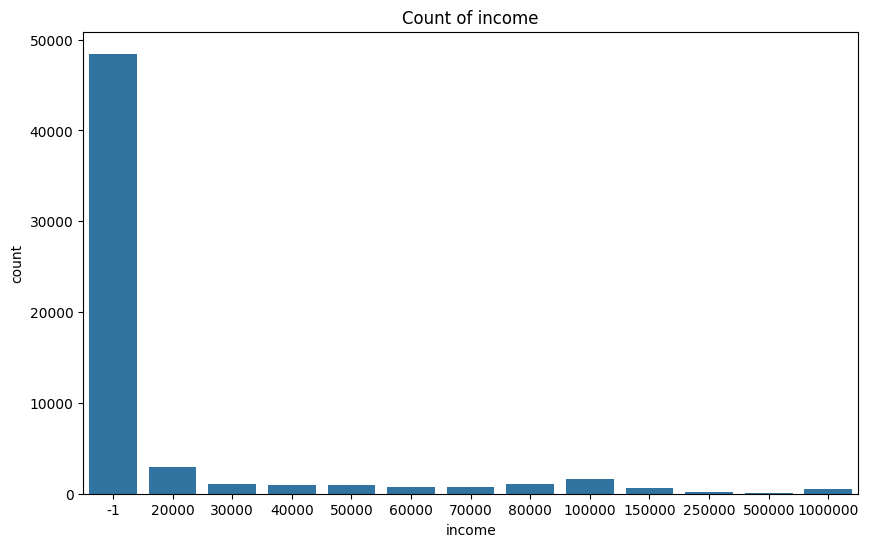

In [8]:
income_counts = df1['income'].value_counts()
print(income_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=df)
plt.xticks(rotation=0)
plt.title('Count of income')
plt.show()

67.0    412
68.0    412
70.0    401
66.0    396
69.0    374
72.0    347
65.0    302
71.0    299
64.0    283
73.0    220
63.0    219
74.0    177
62.0    174
75.0    103
76.0     74
61.0     67
60.0     64
59.0     24
77.0     21
78.0     13
80.0      6
58.0      4
79.0      3
55.0      3
82.0      2
43.0      1
56.0      1
47.0      1
94.0      1
95.0      1
83.0      1
85.0      1
Name: height, dtype: int64


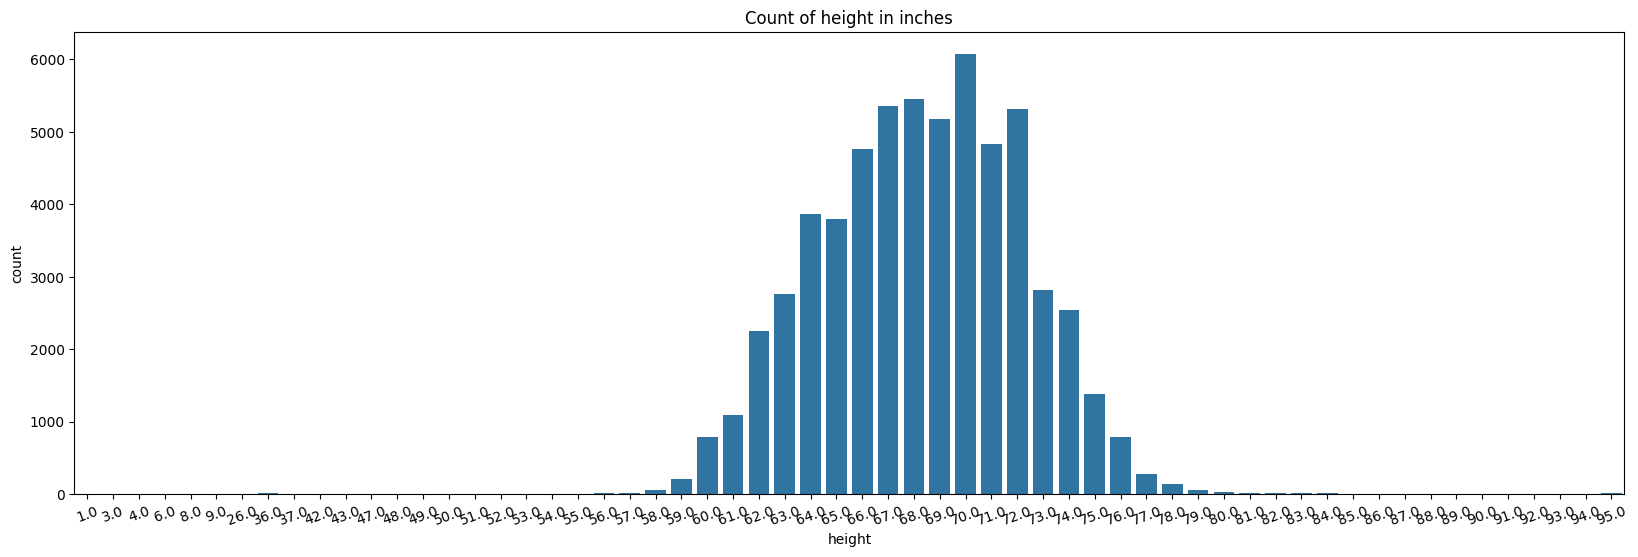

In [9]:
height_counts = df1['height'].value_counts()
print(height_counts)

plt.figure(figsize=(20, 6))
sns.countplot(x='height', data=df)
plt.xticks(rotation=20)
plt.title('Count of height in inches')
plt.show()

26    265
27    241
24    219
25    215
30    206
29    201
23    196
28    190
31    159
22    157
32    154
33    146
34    129
21    115
35    115
20    109
37    101
36     92
38     87
39     85
43     74
42     73
44     72
41     70
40     69
19     68
45     64
47     57
48     51
56     48
49     45
18     42
50     41
54     40
51     39
52     38
46     37
55     33
53     32
60     31
58     30
59     26
61     24
62     20
57     20
64     17
63     17
66     13
65     11
67      9
68      8
69      6
Name: age, dtype: int64


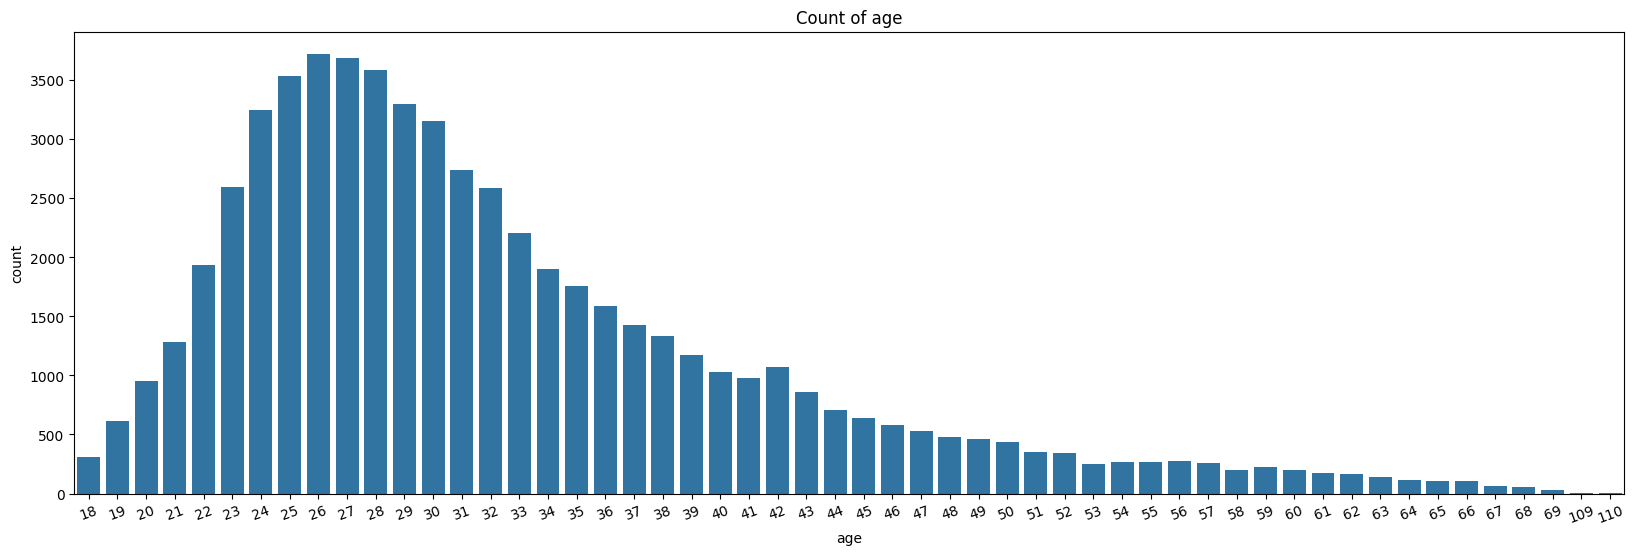

In [10]:
age_counts = df1['age'].value_counts()
print(age_counts)

plt.figure(figsize=(20, 6))
sns.countplot(x='age', data=df)
plt.xticks(rotation=20)
plt.title('Count of age')
plt.show()

no                3523
sometimes          305
when drinking      233
yes                200
trying to quit     146
Name: smokes, dtype: int64


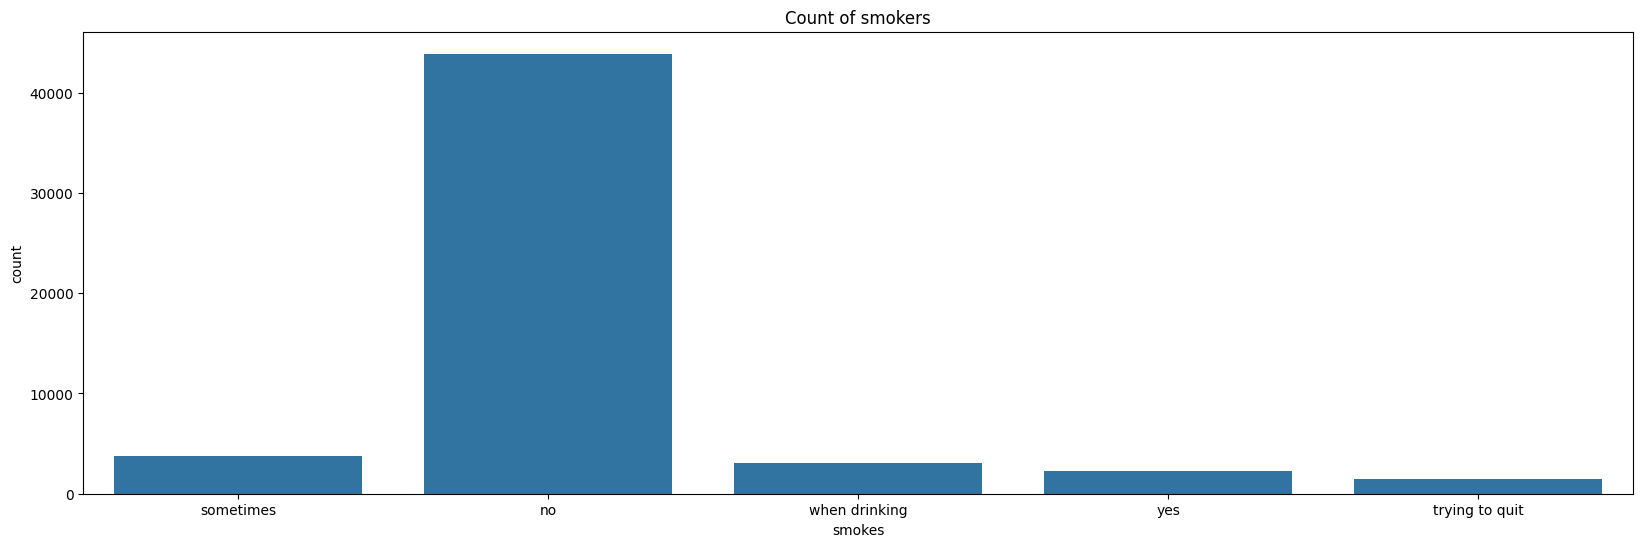

In [11]:
smoke_counts = df1['smokes'].value_counts()
print(smoke_counts)

plt.figure(figsize=(20, 6))
sns.countplot(x='smokes', data=df)
plt.xticks(rotation=0)
plt.title('Count of smokers')
plt.show()

average           1207
fit                906
athletic           799
curvy              448
thin               348
a little extra     322
skinny             125
full figured       102
overweight          60
used up             40
jacked              40
rather not say      10
Name: body_type, dtype: int64


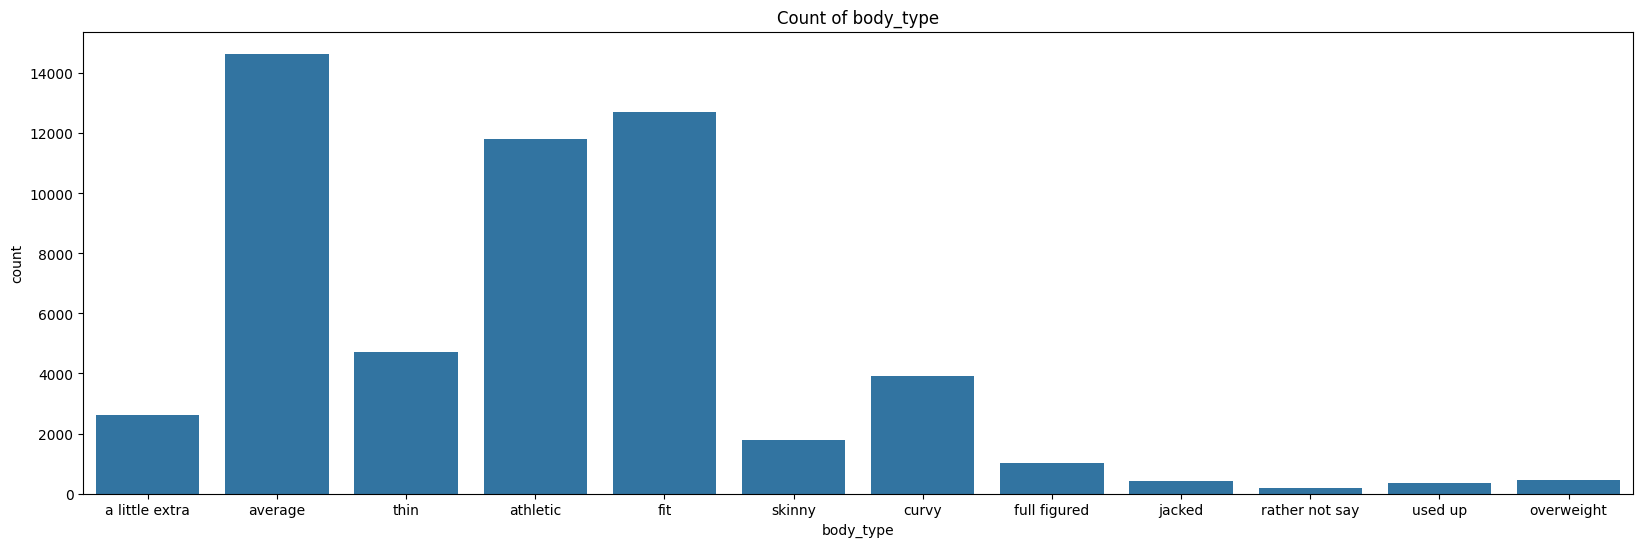

In [12]:
body_type_count = df1['body_type'].value_counts()
print(body_type_count)

plt.figure(figsize=(20, 6))
sns.countplot(x='body_type', data=df)
plt.xticks(rotation=0)
plt.title('Count of body_type')
plt.show()

mostly anything        2257
strictly anything       636
anything                522
mostly vegetarian       441
mostly other            155
strictly vegetarian     125
strictly other           68
vegetarian               45
mostly vegan             41
other                    39
strictly vegan           35
vegan                    16
mostly kosher            13
mostly halal              8
strictly kosher           2
strictly halal            2
kosher                    2
Name: diet, dtype: int64


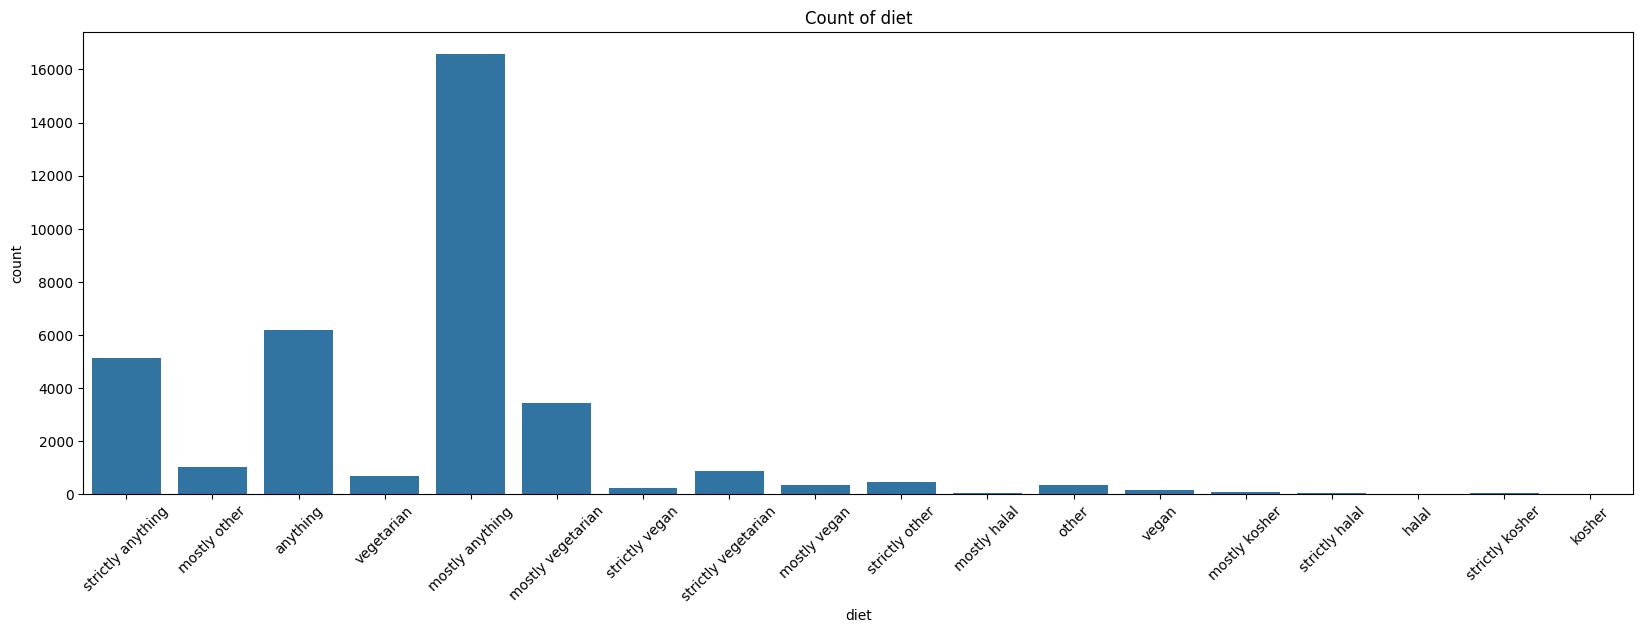

In [13]:
diet_count = df1['diet'].value_counts()
print(diet_count)

plt.figure(figsize=(20, 6))
sns.countplot(x='diet', data=df)
plt.xticks(rotation=45)
plt.title('Count of diet')
plt.show()

m    2470
f    1937
Name: sex, dtype: int64


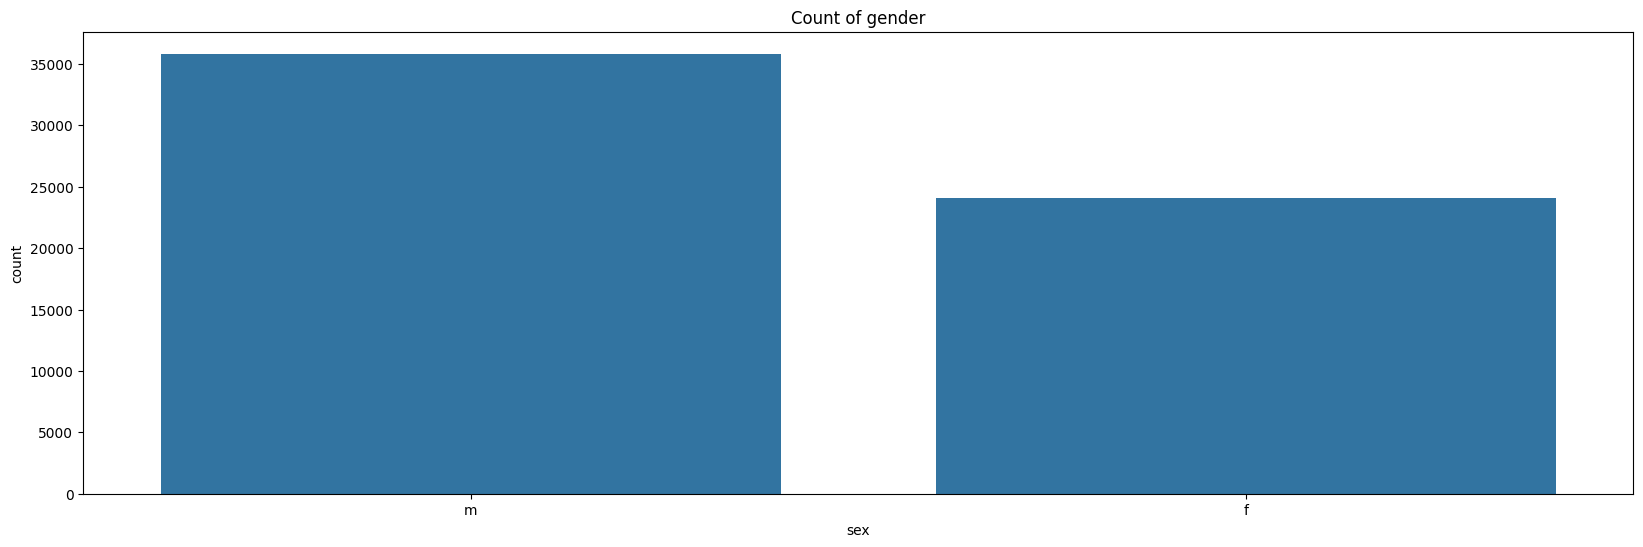

In [14]:
sex_count = df1['sex'].value_counts()
print(sex_count)

plt.figure(figsize=(20, 6))
sns.countplot(x='sex', data=df)
plt.xticks(rotation=0)
plt.title('Count of gender')
plt.show()

socially       2958
rarely          581
often           396
not at all      386
very often       52
desperately      34
Name: drinks, dtype: int64


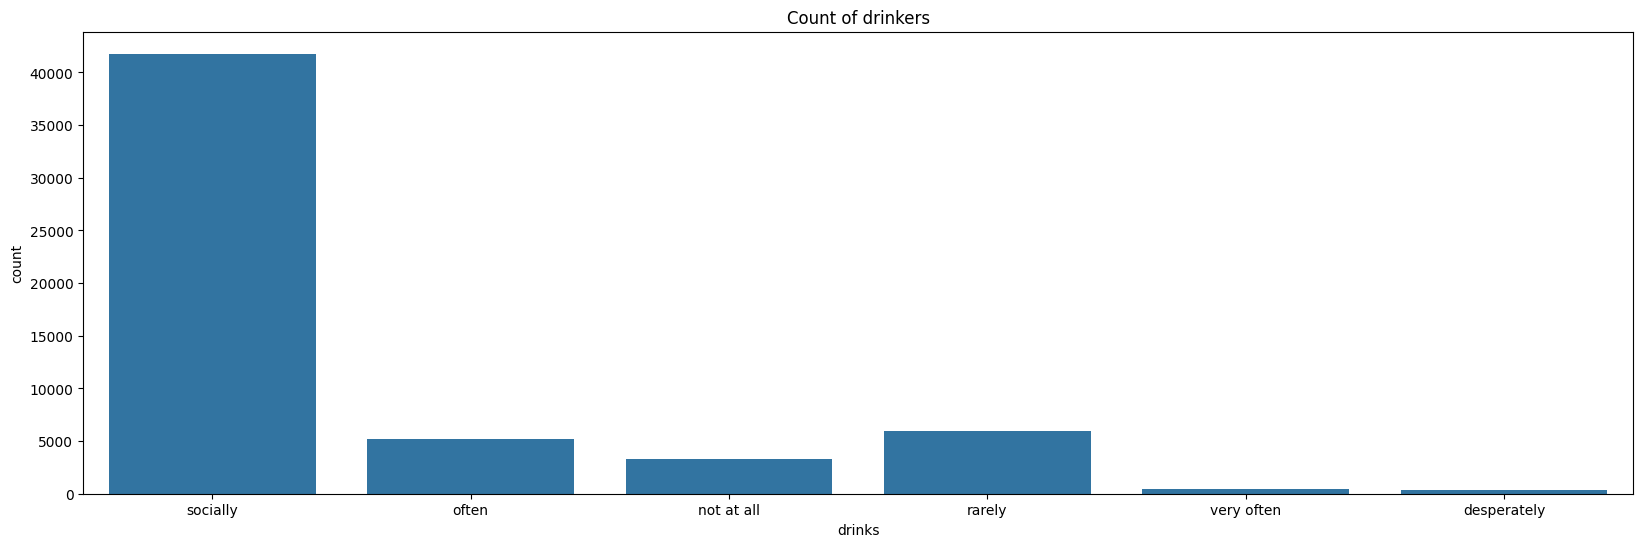

In [15]:
drink_counts = df1['drinks'].value_counts()
print(drink_counts)

plt.figure(figsize=(20, 6))
sns.countplot(x='drinks', data=df)
plt.xticks(rotation=0)
plt.title('Count of drinkers')
plt.show()


never        3423
sometimes     916
often          68
Name: drugs, dtype: int64


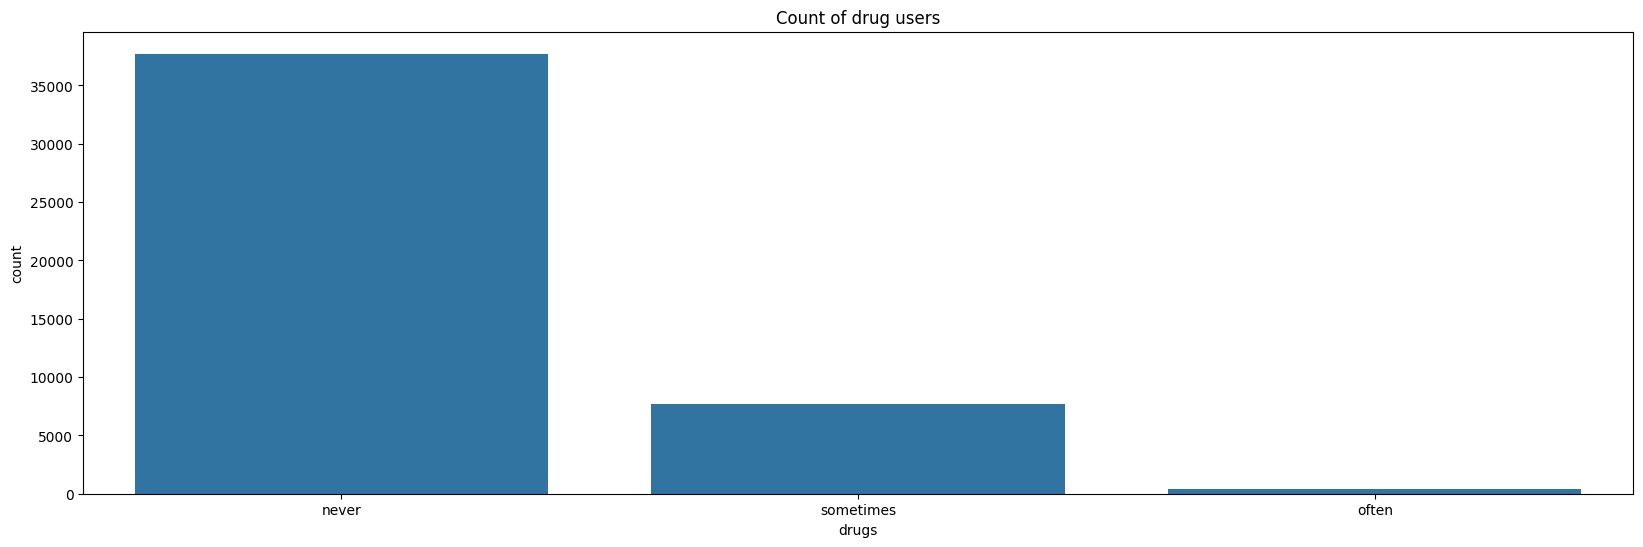

In [16]:
drug_counts = df1['drugs'].value_counts()
print(drug_counts)

plt.figure(figsize=(20, 6))
sns.countplot(x='drugs', data=df)
plt.xticks(rotation=0)
plt.title('Count of drug users')
plt.show()

graduated from college/university    1739
graduated from masters program        699
working on college/university         572
graduated from two-year college       184
graduated from high school            170
working on two-year college           132
working on masters program            128
dropped out of college/university     120
graduated from ph.d program           100
graduated from law school              91
dropped out of space camp              71
graduated from space camp              64
working on ph.d program                62
working on space camp                  48
college/university                     47
graduated from med school              37
dropped out of two-year college        21
working on law school                  20
dropped out of masters program         18
two-year college                       16
working on med school                  16
dropped out of high school             15
working on high school                 12
dropped out of ph.d program       

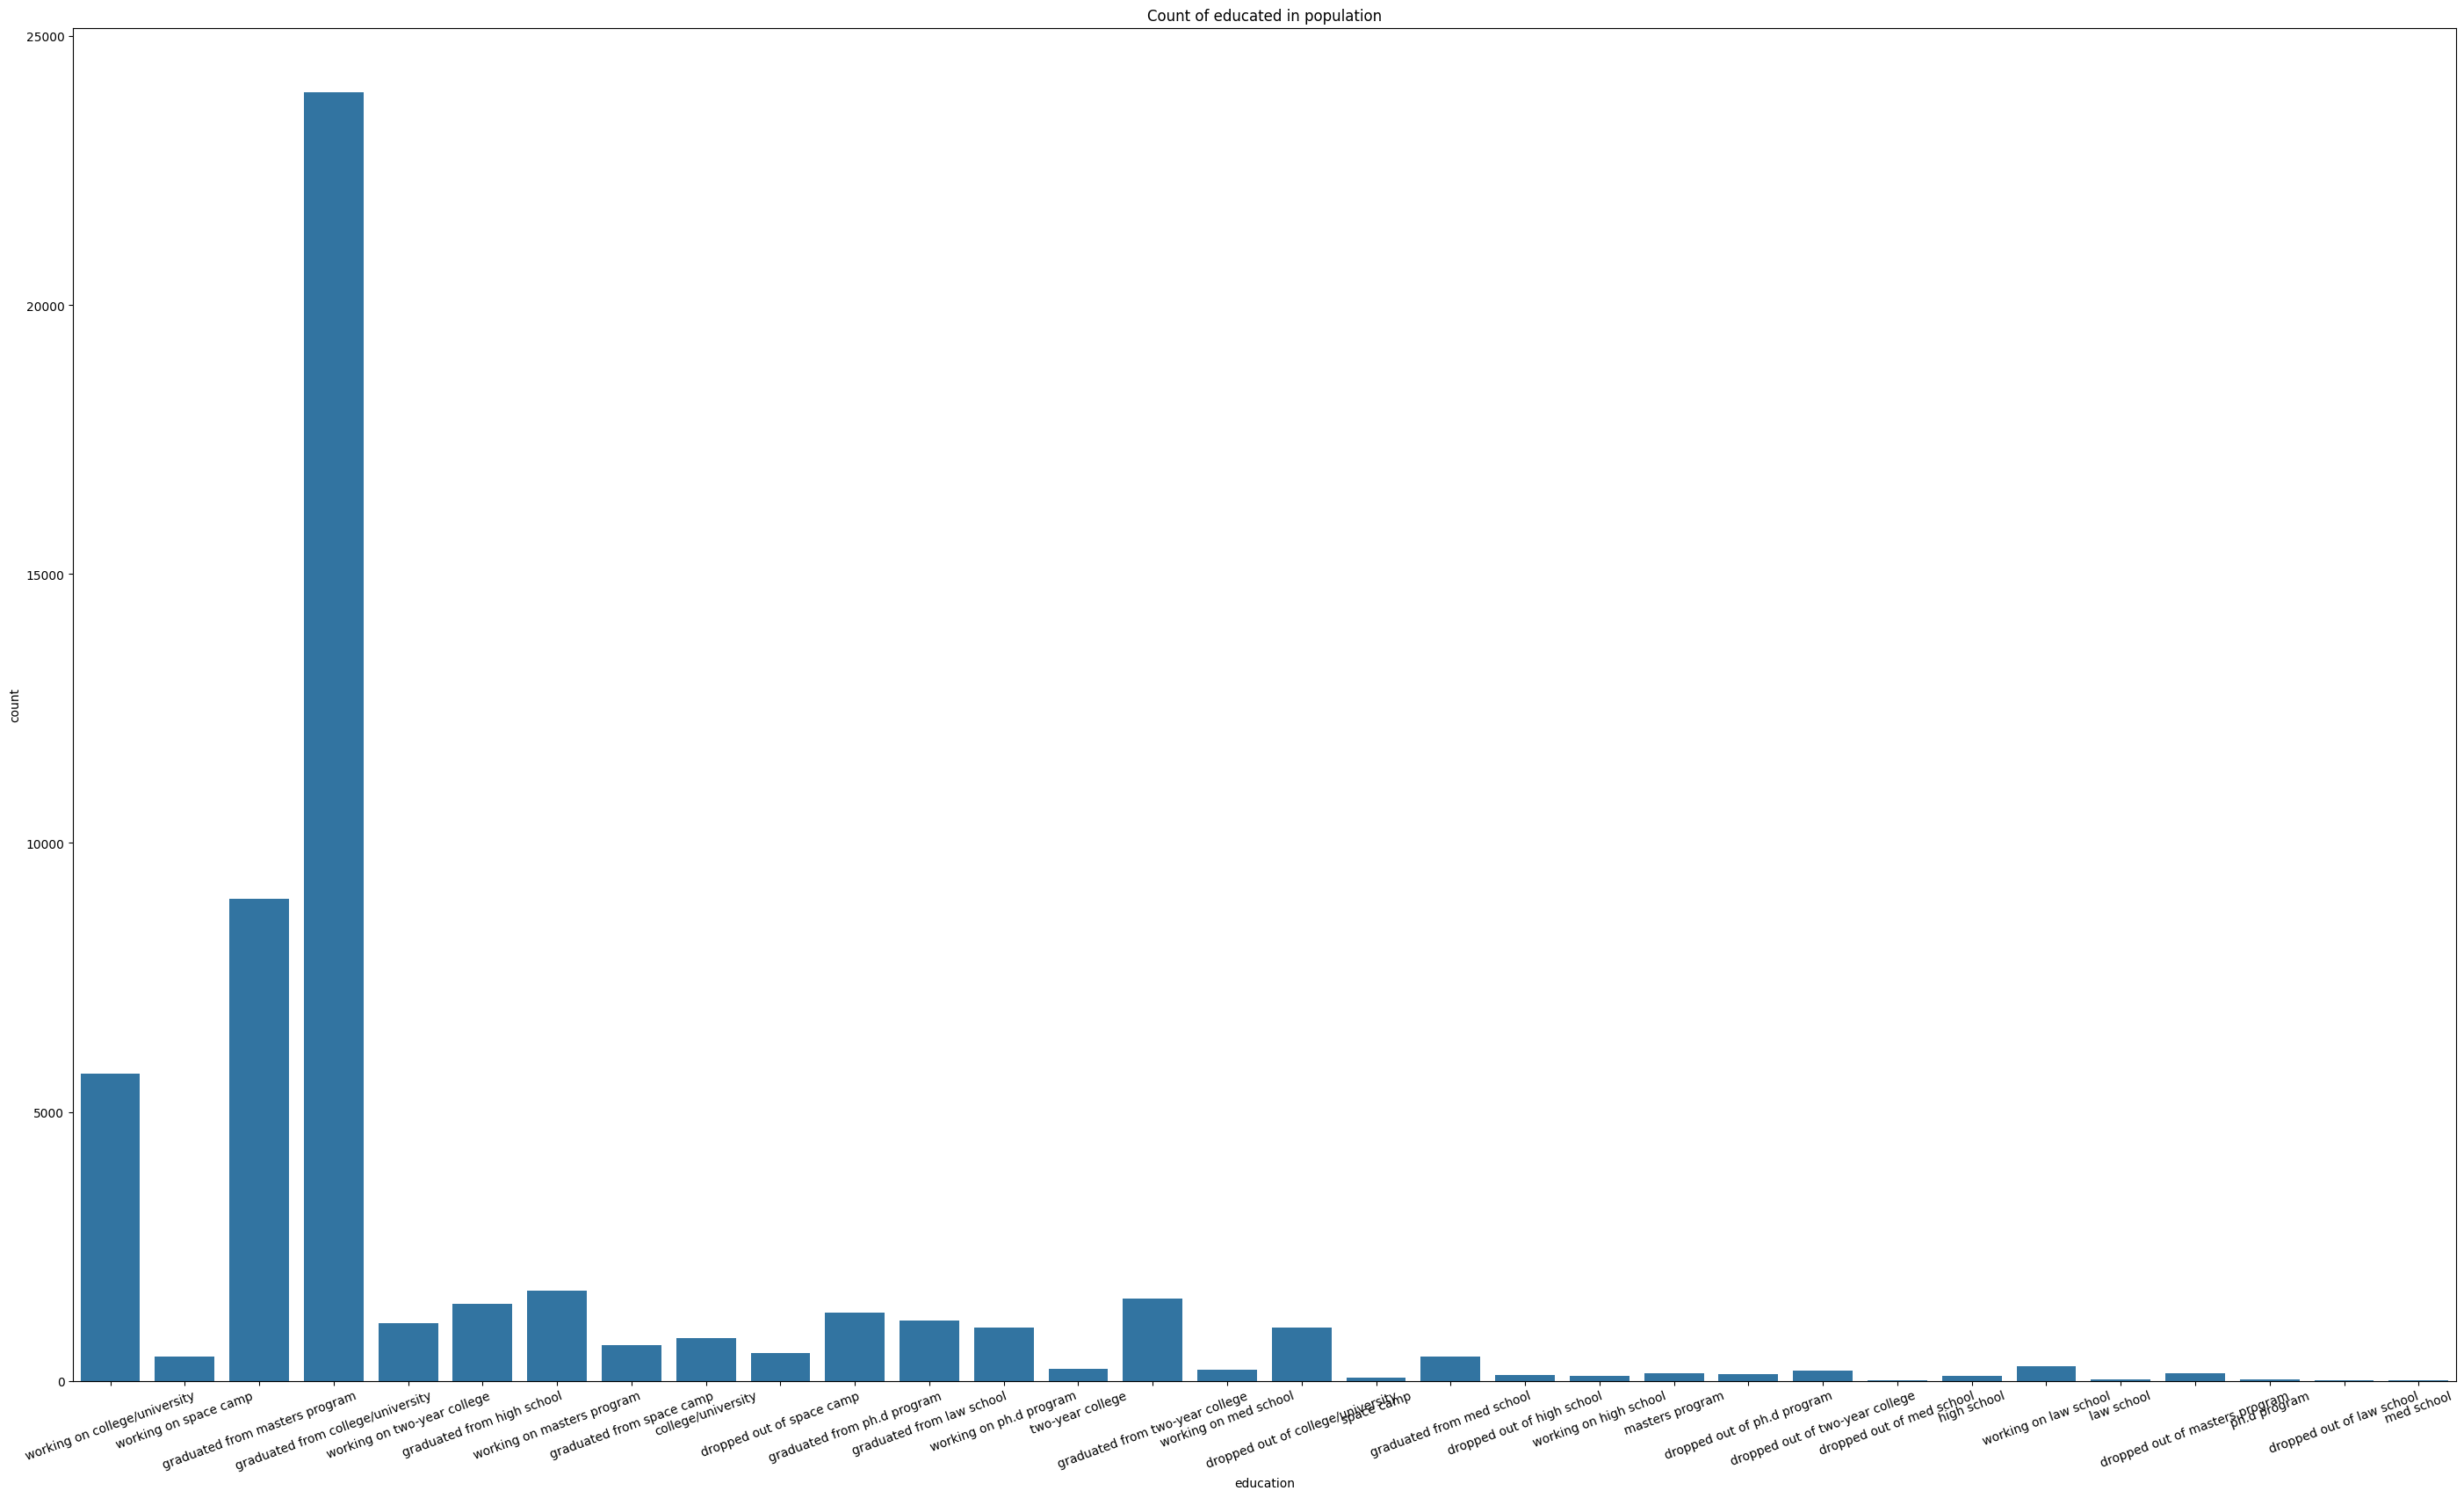

In [17]:
education_counts = df1['education'].value_counts()
print(education_counts)

plt.figure(figsize=(35, 20))
sns.countplot(x='education', data=df)
plt.xticks(rotation=20)
plt.title('Count of educated in population')
plt.show()

Activity 2

In [18]:
labelencoder = LabelEncoder()
df1['sex'] = labelencoder.fit_transform(df1['sex'])
df1

C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\3257164085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex'] = labelencoder.fit_transform(df1['sex'])


,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,1,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
19,33,single,1,straight,athletic,mostly anything,socially,never,graduated from masters program,white,...,i relocated to san francisco half a year ago. ...,"i left my comfort zone far behind in europe, a...","listening, connecting emotionally, analyzing t...","cheerful, open, curious, direct, active, sport...","the art of happiness by dalai lama, how findin...","juicy fruit, water, swimming workouts, yoga pr...",my passions and searching for new ones.,having dinner and a night out with my close fr...,"i'm pretty direct, so you can ask and i'll tel...",you wanna meet up.
22,30,single,1,straight,fit,mostly anything,socially,never,graduated from college/university,white,...,i tend to think the same way a comedian does a...,i'm a supply and demand manager for a sustaina...,"making predictions, planning anything (i'm pre...",that i'm smiling. pretty much at all times.,a confederacy of dunces and infinite jest are ...,"1) sf restaurants, could they be any better? 2...",how to build an empire and a legacy. so far th...,having beers with any number of friends and pr...,when i was a kid i thought steven segal was re...,you're a positive and creative personality loo...
94,29,single,1,straight,fit,mostly anything,socially,sometimes,graduated from college/university,white,...,"my names josh, and i create art for a living. ...",living it,everything,i honestly couldn't say....,-books: anything joseph campbell - osho - terr...,invalid question,the world,out.,no,you're curious.
98,31,single,0,straight,curvy,anything,socially,sometimes,graduated from masters program,white,...,one day i will mod r/hotchickswithspreadsheets...,"presently, holyshitwhatamidoinghere and the sp...","algebra, alliteration, big spoon and little sp...",i look a lot like that chick you banged your f...,- wikipedia - yes - yes - yes - yes,"civility, hope, basic arithmetic, any of the v...","macros. also, puppies. i worry about the futur...","home, high, and doing the dishes.",i'm terrible at small talk which makes for awk...,you find challenge rewarding.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59904,33,single,0,straight,a little extra,mostly other,not at all,never,graduated from two-year college,white,...,hi! about me.... well i currently work from ho...,"besides raising my two children, i work from h...","creative writing, dancing, gardening, listenin...","people usually comment on my long hair, and i'...",i love to read....although hard to pick a favo...,1. my children 2. friends/family 3. laughter 4...,my future... i love to day dream about where i...,depends... if i have a babysitter the possibil...,i'm recently divorced and have a lot of hesita...,if you're looking for a real connection...a go...
59907,24,single,1,straight,skinny,anything,socially,sometimes,graduated from college/university,white,...,"my name is peter. i'm an oakland native, and i...","restaurant work downtown, (not enough) freelan...","remaining calm, selecting music, baking pie, b...",i talk and smile out the side of my mouth. you...,"borges, cortazar, calvino, carpentier, garcia ...",dark indigo jeans daily planner in my back poc...,musical arrangements my next meal my romantic ...,"bar with buds, or bruce lee movies in bathrobes

In [19]:
labelencoder = LabelEncoder()
df1['orientation'] = labelencoder.fit_transform(df1['orientation'])
df1

C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\3077395293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['orientation'] = labelencoder.fit_transform(df1['orientation'])


,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,1,2,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
19,33,single,1,2,athletic,mostly anything,socially,never,graduated from masters program,white,...,i relocated to san francisco half a year ago. ...,"i left my comfort zone far behind in europe, a...","listening, connecting emotionally, analyzing t...","cheerful, open, curious, direct, active, sport...","the art of happiness by dalai lama, how findin...","juicy fruit, water, swimming workouts, yoga pr...",my passions and searching for new ones.,having dinner and a night out with my close fr...,"i'm pretty direct, so you can ask and i'll tel...",you wanna meet up.
22,30,single,1,2,fit,mostly anything,socially,never,graduated from college/university,white,...,i tend to think the same way a comedian does a...,i'm a supply and demand manager for a sustaina...,"making predictions, planning anything (i'm pre...",that i'm smiling. pretty much at all times.,a confederacy of dunces and infinite jest are ...,"1) sf restaurants, could they be any better? 2...",how to build an empire and a legacy. so far th...,having beers with any number of friends and pr...,when i was a kid i thought steven segal was re...,you're a positive and creative personality loo...
94,29,single,1,2,fit,mostly anything,socially,sometimes,graduated from college/university,white,...,"my names josh, and i create art for a living. ...",living it,everything,i honestly couldn't say....,-books: anything joseph campbell - osho - terr...,invalid question,the world,out.,no,you're curious.
98,31,single,0,2,curvy,anything,socially,sometimes,graduated from masters program,white,...,one day i will mod r/hotchickswithspreadsheets...,"presently, holyshitwhatamidoinghere and the sp...","algebra, alliteration, big spoon and little sp...",i look a lot like that chick you banged your f...,- wikipedia - yes - yes - yes - yes,"civility, hope, basic arithmetic, any of the v...","macros. also, puppies. i worry about the futur...","home, high, and doing the dishes.",i'm terrible at small talk which makes for awk...,you find challenge rewarding.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59904,33,single,0,2,a little extra,mostly other,not at all,never,graduated from two-year college,white,...,hi! about me.... well i currently work from ho...,"besides raising my two children, i work from h...","creative writing, dancing, gardening, listenin...","people usually comment on my long hair, and i'...",i love to read....although hard to pick a favo...,1. my children 2. friends/family 3. laughter 4...,my future... i love to day dream about where i...,depends... if i have a babysitter the possibil...,i'm recently divorced and have a lot of hesita...,if you're looking for a real connection...a go...
59907,24,single,1,2,skinny,anything,socially,sometimes,graduated from college/university,white,...,"my name is peter. i'm an oakland native, and i...","restaurant work downtown, (not enough) freelan...","remaining calm, selecting music, baking pie, b...",i talk and smile out the side of my mouth. you...,"borges, cortazar, calvino, carpentier, garcia ...",dark indigo jeans daily planner in my back poc...,musical arrangements my next meal my romantic ...,"bar with buds, or bruce lee movies in bathrobes.",i take myself too seriously sometimes.,"you li

In [20]:
labelencoder = LabelEncoder()
df1['status'] = labelencoder.fit_transform(df1['status'])
df1

C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\3537727398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['status'] = labelencoder.fit_transform(df1['status'])


,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,3,1,2,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
19,33,3,1,2,athletic,mostly anything,socially,never,graduated from masters program,white,...,i relocated to san francisco half a year ago. ...,"i left my comfort zone far behind in europe, a...","listening, connecting emotionally, analyzing t...","cheerful, open, curious, direct, active, sport...","the art of happiness by dalai lama, how findin...","juicy fruit, water, swimming workouts, yoga pr...",my passions and searching for new ones.,having dinner and a night out with my close fr...,"i'm pretty direct, so you can ask and i'll tel...",you wanna meet up.
22,30,3,1,2,fit,mostly anything,socially,never,graduated from college/university,white,...,i tend to think the same way a comedian does a...,i'm a supply and demand manager for a sustaina...,"making predictions, planning anything (i'm pre...",that i'm smiling. pretty much at all times.,a confederacy of dunces and infinite jest are ...,"1) sf restaurants, could they be any better? 2...",how to build an empire and a legacy. so far th...,having beers with any number of friends and pr...,when i was a kid i thought steven segal was re...,you're a positive and creative personality loo...
94,29,3,1,2,fit,mostly anything,socially,sometimes,graduated from college/university,white,...,"my names josh, and i create art for a living. ...",living it,everything,i honestly couldn't say....,-books: anything joseph campbell - osho - terr...,invalid question,the world,out.,no,you're curious.
98,31,3,0,2,curvy,anything,socially,sometimes,graduated from masters program,white,...,one day i will mod r/hotchickswithspreadsheets...,"presently, holyshitwhatamidoinghere and the sp...","algebra, alliteration, big spoon and little sp...",i look a lot like that chick you banged your f...,- wikipedia - yes - yes - yes - yes,"civility, hope, basic arithmetic, any of the v...","macros. also, puppies. i worry about the futur...","home, high, and doing the dishes.",i'm terrible at small talk which makes for awk...,you find challenge rewarding.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59904,33,3,0,2,a little extra,mostly other,not at all,never,graduated from two-year college,white,...,hi! about me.... well i currently work from ho...,"besides raising my two children, i work from h...","creative writing, dancing, gardening, listenin...","people usually comment on my long hair, and i'...",i love to read....although hard to pick a favo...,1. my children 2. friends/family 3. laughter 4...,my future... i love to day dream about where i...,depends... if i have a babysitter the possibil...,i'm recently divorced and have a lot of hesita...,if you're looking for a real connection...a go...
59907,24,3,1,2,skinny,anything,socially,sometimes,graduated from college/university,white,...,"my name is peter. i'm an oakland native, and i...","restaurant work downtown, (not enough) freelan...","remaining calm, selecting music, baking pie, b...",i talk and smile out the side of my mouth. you...,"borges, cortazar, calvino, carpentier, garcia ...",dark indigo jeans daily planner in my back poc...,musical arrangements my next meal my romantic ...,"bar with buds, or bruce lee movies in bathrobes.",i take myself too seriously sometimes.,"you like guys who can dress and smell nic

In [21]:
df1['sign_cleaned'] = df1.sign.str.split(' ').str[0]
df1['religion_cleaned'] = df1.religion.str.split(' ').str[0]
df1['ethnicity_cleaned'] = df1.ethnicity.str.split(' ').str[0]
df1['ethnicity_cleaned'] = df1['ethnicity_cleaned'].str.replace(',','')


df1

C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\2964176854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sign_cleaned'] = df1.sign.str.split(' ').str[0]
C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\2964176854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['religion_cleaned'] = df1.religion.str.split(' ').str[0]
C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\2964176854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sign_cleaned,religion_cleaned,ethnicity_cleaned
0,22,3,1,2,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...,gemini,agnosticism,asian
19,33,3,1,2,athletic,mostly anything,socially,never,graduated from masters program,white,...,"cheerful, open, curious, direct, active, sport...","the art of happiness by dalai lama, how findin...","juicy fruit, water, swimming workouts, yoga pr...",my passions and searching for new ones.,having dinner and a night out with my close fr...,"i'm pretty direct, so you can ask and i'll tel...",you wanna meet up.,pisces,catholicism,white
22,30,3,1,2,fit,mostly anything,socially,never,graduated from college/university,white,...,that i'm smiling. pretty much at all times.,a confederacy of dunces and infinite jest are ...,"1) sf restaurants, could they be any better? 2...",how to build an empire and a legacy. so far th...,having beers with any number of friends and pr...,when i was a kid i thought steven segal was re...,you're a positive and creative personality loo...,sagittarius,agnosticism,white
94,29,3,1,2,fit,mostly anything,socially,sometimes,graduated from college/university,white,...,i honestly couldn't say....,-books: anything joseph campbell - osho - terr...,invalid question,the world,out.,no,you're curious.,libra,agnosticism,white
98,31,3,0,2,curvy,anything,socially,sometimes,graduated from masters program,white,...,i look a lot like that chick you banged your f...,- wikipedia - yes - yes - yes - yes,"civility, hope, basic arithmetic, any of the v...","macros. also, puppies. i worry about the futur...","home, high, and doing the dishes.",i'm terrible at small talk which makes for awk...,you find challenge rewarding.,pisces,atheism,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59904,33,3,0,2,a little extra,mostly other,not at all,never,graduated from two-year college,white,...,"people usually comment on my long hair, and i'...",i love to read....although hard to pick a favo...,1. my children 2. friends/family 3. laughter 4...,my future... i love to day dream about where i...,depends... if i have a babysitter the possibil...,i'm recently divorced and have a lot of hesita...,if you're looking for a real connection...a go...,cancer,other,white
59907,24,3,1,2,skinny,anything,socially,sometimes,graduated from college/university,white,...,i talk and smile out the side of my mouth. you...,"borges, cortazar, calvino, carpentier, garcia ...",dark indigo jeans daily planner in my back poc...,musical arrangements my next meal my romantic ...,"bar with buds, or bruce lee movies in bathrobes.",i take myself too seriously sometimes.,"you like guys who can dress and smell nice, co...",taurus,atheism,white
59913,29,3,0,2,full figured,mostly anything,socially,never,graduated from college/university,black,...,my smile or eyes.,"i don't have cable, so outside of the morning ...",laughing my cell phone friends family and 2 ot...,what's going to happen next.,either on my couch watching tv with a bottle o...,i used to have a major crush on yanni...don't ...,you would like to get to know me in person and...,libra,agnosticism,black
59942,24,3,1,2,fit,mostly anything,often,sometimes,working on college/university,"white, other",...,"dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus to/from wo...,"bringin' home bacon, or drinking and shakin'!",when i was 18 i got a tattoo of waldo some

In [22]:
drinks_codes = {
    "not at all": 0,
    "rarely": 1,
    "socially": 2,
    "often": 3,
    "very often": 4,
    "desperately": 5
}

drugs_codes = {
    "never": 0,
    "sometimes": 1,
    "often": 2
}

smokes_codes = {
    "no": 0,
    "when drinking": 1,
    "sometimes": 2,
    "yes": 3,
    "trying to quit": 3
}

"""
body_type_codes = {'thin':0,
                   'skinny':1,
                   'fit':2,
                   'athletic':3,
                   'jacked':4,
                   'rather not say':5,
                   'average':6,
                   'a little extra':7,
                   'used up':8,
                   'curvy':9,
                   'overweight':10,
                   'full figured':11}

df_copy["body_type_code"] = df_copy['body_type'].map(body_type_codes)

"""

def catVartoNumeric(dataframe):
    #convert drinks column to numeric value
    
    dataframe["drinks_code"] = dataframe['drinks'].map(drinks_codes)

    #convert drugs column to numeric value

    dataframe["drugs_code"] = dataframe['drugs'].map(drugs_codes)

    #convert smokes ordinal categorical values into numeric value

    dataframe["smokes_code"] = dataframe['smokes'].map(smokes_codes)

    return


Task 3

In [23]:
#create copy of dataframe to do the changes only to a copy of data
df_copy = df1

#convert 'smokes', 'drinks' and 'drugs' to numeric form

catVartoNumeric(df_copy)

selected_features = ['sign_cleaned', 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'smokes_code', 'drinks_code' , 'drugs_code']
df_copy = df_copy[selected_features].dropna()

#convert 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job' into dummy variables

categoricalCols = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job']

for col in categoricalCols:
    df_copy = pd.get_dummies(df_copy, columns=[col], prefix = [col])

df_copy

C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\1442602108.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["drinks_code"] = dataframe['drinks'].map(drinks_codes)
C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\1442602108.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["drugs_code"] = dataframe['drugs'].map(drugs_codes)
C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\1442602108.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,sign_cleaned,smokes_code,drinks_code,drugs_code,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,pisces,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22,sagittarius,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94,libra,0,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
98,pisces,0,2,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59904,cancer,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59907,taurus,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59913,libra,0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59942,leo,0,3,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_copy.head(10)

#print(df_copy.columns)

,sign_cleaned,smokes_code,drinks_code,drugs_code,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,2,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19,pisces,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22,sagittarius,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94,libra,0,2,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
98,pisces,0,2,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
106,aries,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
113,capricorn,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
121,gemini,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
123,sagittarius,2,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,libra,0,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
#Y is the target column, X has the features
X = df_copy.iloc[:, 1:]
y = df_copy['sign_cleaned']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

#use MinMaxScaler to put all features values in the same range and scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Random Classification

In [26]:
# Instantiate the Random Forest model
RFmodel = RandomForestClassifier()

# Fit the Random Forest model to the training data
RFmodel.fit(X_train_scaled, y_train)

# Calculate training accuracy
training_accuracy = RFmodel.score(X_train_scaled, y_train)

print("The accuracy of the model on training data is: {}%".format(round(training_accuracy, 2) * 100))
print()

# Make predictions on the test data
predictions = RFmodel.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, predictions))


The accuracy of the model on training data is: 96.0%

              precision    recall  f1-score   support

    aquarius       0.05      0.05      0.05        62
       aries       0.06      0.04      0.05        89
      cancer       0.05      0.04      0.05        92
   capricorn       0.11      0.11      0.11        66
      gemini       0.10      0.10      0.10        80
         leo       0.05      0.06      0.06        83
       libra       0.06      0.06      0.06        69
      pisces       0.04      0.05      0.04        61
 sagittarius       0.14      0.15      0.14        75
     scorpio       0.11      0.13      0.12        61
      taurus       0.10      0.09      0.09        68
       virgo       0.11      0.14      0.13        76

    accuracy                           0.08       882
   macro avg       0.08      0.09      0.08       882
weighted avg       0.08      0.08      0.08       882



Logistic Regression

In [27]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 16.0%

              precision    recall  f1-score   support

    aquarius       0.05      0.05      0.05        62
       aries       0.08      0.08      0.08        89
      cancer       0.17      0.22      0.19        92
   capricorn       0.05      0.03      0.04        66
      gemini       0.06      0.07      0.07        80
         leo       0.07      0.04      0.05        83
       libra       0.01      0.01      0.01        69
      pisces       0.07      0.05      0.06        61
 sagittarius       0.05      0.07      0.06        75
     scorpio       0.02      0.03      0.03        61
      taurus       0.10      0.06      0.07        68
       virgo       0.08      0.11      0.09        76

    accuracy                           0.07       882
   macro avg       0.07      0.07      0.07       882
weighted avg       0.07      0.07      0.07       882



Artifical Neural Network

In [28]:
# Assuming you have X_train, X_test, y_train, y_test, X_train_scaled, and X_test_scaled already defined

# Instantiate the MLPClassifier
ANNmodel = MLPClassifier(max_iter=1000)  # You may need to adjust max_iter based on convergence

# Fit the ANN model to the training data
ANNmodel.fit(X_train_scaled, y_train)

# Calculate training accuracy
training_accuracy = ANNmodel.score(X_train_scaled, y_train)

print("The accuracy of the model on training data is: {}%".format(round(training_accuracy, 2) * 100))
print()

# Make predictions on the test data
predictions = ANNmodel.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, predictions))


The accuracy of the model on training data is: 80.0%

              precision    recall  f1-score   support

    aquarius       0.06      0.06      0.06        62
       aries       0.14      0.12      0.13        89
      cancer       0.11      0.10      0.10        92
   capricorn       0.10      0.09      0.10        66
      gemini       0.13      0.10      0.11        80
         leo       0.07      0.07      0.07        83
       libra       0.03      0.03      0.03        69
      pisces       0.03      0.05      0.04        61
 sagittarius       0.03      0.03      0.03        75
     scorpio       0.08      0.10      0.09        61
      taurus       0.07      0.06      0.06        68
       virgo       0.08      0.09      0.09        76

    accuracy                           0.08       882
   macro avg       0.08      0.08      0.08       882
weighted avg       0.08      0.08      0.08       882



c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Decision Tree Classifier

In [29]:
DTmodel = DecisionTreeClassifier()

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 96.0%

              precision    recall  f1-score   support

    aquarius       0.04      0.05      0.04        62
       aries       0.07      0.07      0.07        89
      cancer       0.14      0.14      0.14        92
   capricorn       0.09      0.09      0.09        66
      gemini       0.06      0.06      0.06        80
         leo       0.16      0.16      0.16        83
       libra       0.05      0.06      0.06        69
      pisces       0.08      0.08      0.08        61
 sagittarius       0.09      0.07      0.08        75
     scorpio       0.12      0.15      0.14        61
      taurus       0.07      0.06      0.06        68
       virgo       0.11      0.12      0.12        76

    accuracy                           0.09       882
   macro avg       0.09      0.09      0.09       882
weighted avg       0.09      0.09      0.09       882



The accuracy of decision tree model on training data is 96% which is very high but on test data it performs very bad by 10% accuracy. This shows that decision tree model suffers from overfitting.

The probability of getting zodiac sign from the testing set is low, hence, using the features cannot predict the zodiac signs of the users.

Task 4

In [30]:
#create copy of dataframe to do the changes only to a copy of data
df_copy2 = df1

#convert 'smokes', 'drinks' and 'drugs' to numeric form

catVartoNumeric(df_copy2)

selected_features = ['body_type', 'diet', 'sex', 'smokes_code', 'drinks_code' , 'drugs_code', 'age']
df_copy2 = df_copy2[selected_features].dropna()

#convert 'diet' and 'sex' into dummy variables
categoricalCols = ['diet', 'sex']

for col in categoricalCols:
    df_copy2 = pd.get_dummies(df_copy2, columns=[col], prefix = [col])

df_copy2

C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\1442602108.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["drinks_code"] = dataframe['drinks'].map(drinks_codes)
C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\1442602108.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["drugs_code"] = dataframe['drugs'].map(drugs_codes)
C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\1442602108.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,body_type,smokes_code,drinks_code,drugs_code,age,diet_anything,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,...,diet_strictly anything,diet_strictly halal,diet_strictly kosher,diet_strictly other,diet_strictly vegan,diet_strictly vegetarian,diet_vegan,diet_vegetarian,sex_0,sex_1
0,a little extra,2,2,0,22,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
19,athletic,0,2,0,33,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
22,fit,0,2,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
94,fit,0,2,1,29,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
98,curvy,0,2,1,31,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59904,a little extra,0,0,0,33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
59907,skinny,2,2,1,24,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59913,full figured,0,2,0,29,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
59942,fit,0,3,1,24,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#Y is the target column, X has the features
X = df_copy2.iloc[:, 1:]
y = df_copy2['body_type']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Logistic Regression
- A binary classification. In order to do a multi class classification, "multinomial" argument is used as the  multi_class parameter.

In [32]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 28.999999999999996%

                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00        76
      athletic       0.41      0.08      0.13       179
       average       0.28      0.69      0.40       241
         curvy       0.19      0.38      0.25        72
           fit       0.31      0.19      0.23       180
  full figured       0.00      0.00      0.00        17
        jacked       0.00      0.00      0.00         3
    overweight       0.00      0.00      0.00        16
rather not say       0.00      0.00      0.00         2
        skinny       0.00      0.00      0.00        24
          thin       0.50      0.02      0.03        65
       used up       0.00      0.00      0.00         7

      accuracy                           0.28       882
     macro avg       0.14      0.11      0.09       882
  weighted avg       0.28      0.28      0.21       882



c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

In this model, the training accuracy is at 28.9%, while the testing accuracy is at 29%.

Random Forest
- Finding the best number of estimators.

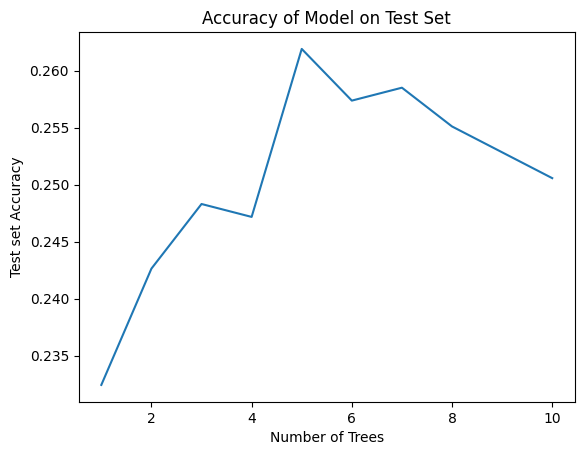

Best number of trees for the best accuracy is: 5


In [33]:
# Initialize an empty list to store accuracies
accuracies = []

# Range of values for the number of trees in the forest
n_estimators_list = list(range(1, 11))

# Loop through different values for the number of trees
for n_estimators in n_estimators_list:
    RFmodel = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    RFmodel.fit(X_train_scaled, y_train)
    accuracies.append(RFmodel.score(X_test_scaled, y_test))

# Plot the accuracy vs. the number of trees
plt.plot(n_estimators_list, accuracies)
plt.xlabel("Number of Trees")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

# Convert the accuracies to a numpy array for easier analysis
accuracies_np = np.asarray(accuracies)

# Find the best number of trees for the highest accuracy
best_n_estimators = n_estimators_list[np.argmax(accuracies_np)]
print(f"Best number of trees for the best accuracy is: {best_n_estimators}")

In [34]:
# Fit the model on the training data
RFmodel.fit(X_train_scaled, y_train)

# Calculate and print the training accuracy
training_accuracy = RFmodel.score(X_train_scaled, y_train)
print("The accuracy of the model on training data is: {:.2%}".format(training_accuracy))
print()

# Make predictions on the test data
predictions = RFmodel.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, predictions))

The accuracy of the model on training data is: 65.70%

                precision    recall  f1-score   support

a little extra       0.09      0.07      0.08        76
      athletic       0.29      0.27      0.28       179
       average       0.31      0.39      0.35       241
         curvy       0.22      0.24      0.23        72
           fit       0.26      0.24      0.25       180
  full figured       0.08      0.06      0.07        17
        jacked       0.00      0.00      0.00         3
    overweight       0.11      0.06      0.08        16
rather not say       0.00      0.00      0.00         2
        skinny       0.21      0.17      0.19        24
          thin       0.11      0.09      0.10        65
       used up       0.00      0.00      0.00         7

      accuracy                           0.25       882
     macro avg       0.14      0.13      0.13       882
  weighted avg       0.24      0.25      0.24       882



c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

Decison Tree Classifier
- When using a Decision Tree classifier in python, it is good to tune its hyperparameters to achieve best result.
- The best perimeter shows the best result.
- By using grid search technique, the best training is to use 'criterion', 'max_depth', 'min_samples_leaf' for tuning.

In [35]:
param_grid = {"max_depth": [8, 12, 18, 24, None],
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)

tree_cv.fit(X_train_scaled, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5}
Best score is 0.2564539007092198


In [36]:
DTmodel = DecisionTreeClassifier(criterion =  'gini' , max_depth =  8, min_samples_leaf = 2)

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

print(DTmodel.get_depth())

The accuracy of model on training data is: 34.0%

                precision    recall  f1-score   support

a little extra       0.22      0.03      0.05        76
      athletic       0.31      0.14      0.19       179
       average       0.29      0.49      0.36       241
         curvy       0.20      0.35      0.25        72
           fit       0.29      0.40      0.33       180
  full figured       0.00      0.00      0.00        17
        jacked       0.00      0.00      0.00         3
    overweight       0.00      0.00      0.00        16
rather not say       0.00      0.00      0.00         2
        skinny       0.33      0.04      0.07        24
          thin       0.14      0.02      0.03        65
       used up       0.00      0.00      0.00         7

      accuracy                           0.28       882
     macro avg       0.15      0.12      0.11       882
  weighted avg       0.26      0.28      0.24       882

8


c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

Through the decision tree classifier, it can be seen that the max depth is 8, and the best score is at 0.285.

Using these information, the model was created and shows the accuracy of the training data is 32%, while the testing data shows an accuracy of 0.29.

Support Vector Machine
- Used for hypertuning.
- C', 'gamma', 'kernel' for tuning.

In [37]:
param_grid = {'C': [0.1],
              'gamma': [0.1],
              'kernel': ['linear']}

SVCmodel = SVC()

svm_cv = GridSearchCV(SVCmodel, param_grid, cv = 3)

svm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Support Vector Machine classifier Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

Tuned Support Vector Machine classifier Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best score is 0.27858156028368797


In [38]:
SVCmodel = SVC(kernel = 'rbf', C = 0.1, gamma = 1)

SVCmodel.fit(X_train_scaled, y_train)

training_accuracy = SVCmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 28.000000000000004%

                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00        76
      athletic       0.00      0.00      0.00       179
       average       0.27      0.94      0.42       241
         curvy       0.33      0.01      0.03        72
           fit       0.33      0.09      0.15       180
  full figured       0.00      0.00      0.00        17
        jacked       0.00      0.00      0.00         3
    overweight       0.00      0.00      0.00        16
rather not say       0.00      0.00      0.00         2
        skinny       0.00      0.00      0.00        24
          thin       0.00      0.00      0.00        65
       used up       0.00      0.00      0.00         7

      accuracy                           0.28       882
     macro avg       0.08      0.09      0.05       882
  weighted avg       0.17      0.28      0.15       882



c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

- From the various models, it can be seen that the accuracy of testing data is between 28.9 and 48.9%, and the accuracy of the training data is at 29%.
- This means, using the various features, it is unable to predict the body type of the users by looking at age, frequency of smoking, frequency of drinking, whether the users used drugs, and diet.

Task 5

In [39]:
#create copy of dataframe to do the changes only to a copy of data
df_copy5 = df1

#replace -1 values with nan
df_copy5[df_copy5.income==-1]= np.nan

selected_features = ['sex', 'education', 'income']
df_copy5 = df_copy5[selected_features].dropna()

#convert 'education' into dummy variable
df_copy5 = pd.get_dummies(df_copy5, columns=['education'], prefix = ['education'])

df_copy5

C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\2007134783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy5[df_copy5.income==-1]= np.nan


,sex,income,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of ph.d program,education_dropped out of space camp,education_dropped out of two-year college,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
94,1.0,40000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0.0,20000.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
123,1.0,1000000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
137,1.0,80000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,0.0,20000.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59642,0.0,20000.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
59719,1.0,100000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59747,0.0,30000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59838,1.0,50000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#Y is the target column, X has the features
X = df_copy5.iloc[:, 1:]
y = df_copy5['income']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

#use MinMaxScaler to put all features values in the same range and scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Random Forest

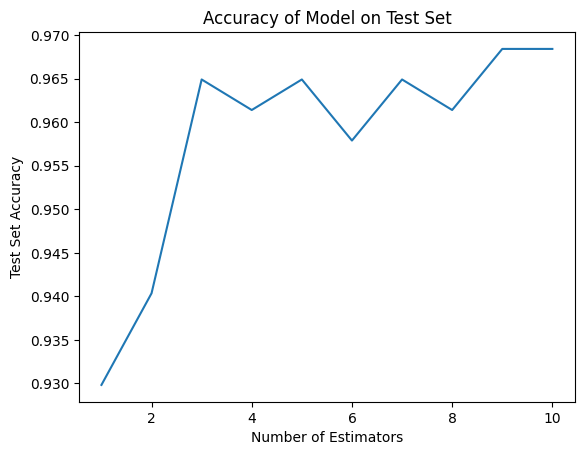

Best number of estimators for the best accuracy is: 9


In [41]:
# Assuming you have X_train, X_test, y_train, y_test already defined

# Define the range of estimators
n_estimators_list = list(range(1, 11))

# Initialize lists to store accuracies
accuracies = []

# Iterate through different number of estimators
for n_estimators in n_estimators_list:
    # Initialize the Random Forest model
    RFmodel = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Fit the model on the training data
    RFmodel.fit(X_train, y_train)

    # Append the accuracy on the test set to the list
    accuracies.append(RFmodel.score(X_test, y_test))

# Plot the accuracy vs the number of estimators
plt.plot(n_estimators_list, accuracies)
plt.xlabel("Number of Estimators")
plt.ylabel("Test Set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

# Convert accuracies to a numpy array for further analysis
l_np = np.asarray(accuracies)

# Find the best number of estimators for the best accuracy
best_n_estimators = n_estimators_list[np.argmax(l_np)]
print(f"Best number of estimators for the best accuracy is: {best_n_estimators}")


In [42]:
# Assuming you have X_train, X_test, y_train, y_test already defined

# Set the best number of estimators
best_n_estimators = 9

# Initialize the Random Forest model with the best number of estimators
RFmodel = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# Fit the model on the training data
RFmodel.fit(X_train, y_train)

# Make predictions on the test set
RF_predictions = RFmodel.predict(X_test)

In [43]:

print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

     20000.0       1.00      1.00      1.00       105
     30000.0       1.00      1.00      1.00        25
     40000.0       1.00      1.00      1.00        24
     50000.0       0.89      0.94      0.92        18
     60000.0       0.94      1.00      0.97        17
     70000.0       0.83      0.91      0.87        11
     80000.0       0.93      0.93      0.93        30
    100000.0       1.00      0.94      0.97        32
    150000.0       0.91      1.00      0.95        10
    250000.0       1.00      1.00      1.00         3
    500000.0       0.00      0.00      0.00         1
   1000000.0       1.00      0.78      0.88         9

    accuracy                           0.97       285
   macro avg       0.88      0.88      0.87       285
weighted avg       0.97      0.97      0.97       285



Decision Tree

In [44]:
param_grid = {"max_depth": [8, 12, 18, 24, None],
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)

tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1}
Best score is 1.0


In [45]:
DTmodel = DecisionTreeClassifier(criterion =  'gini' , max_depth =  18, min_samples_leaf = 3)

DTmodel.fit(X_train, y_train)

training_accuracy = DTmodel.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 100.0%

              precision    recall  f1-score   support

     20000.0       1.00      1.00      1.00       105
     30000.0       1.00      1.00      1.00        25
     40000.0       1.00      1.00      1.00        24
     50000.0       1.00      1.00      1.00        18
     60000.0       1.00      1.00      1.00        17
     70000.0       1.00      1.00      1.00        11
     80000.0       1.00      1.00      1.00        30
    100000.0       1.00      1.00      1.00        32
    150000.0       1.00      1.00      1.00        10
    250000.0       1.00      1.00      1.00         3
    500000.0       1.00      1.00      1.00         1
   1000000.0       1.00      1.00      1.00         9

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



Support Vector Classifier

In [46]:
SVCmodel = SVC(kernel = 'linear', C = 1)

SVCmodel.fit(X_train, y_train)

training_accuracy = SVCmodel.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 100.0%

              precision    recall  f1-score   support

     20000.0       1.00      1.00      1.00       105
     30000.0       1.00      1.00      1.00        25
     40000.0       1.00      1.00      1.00        24
     50000.0       1.00      1.00      1.00        18
     60000.0       1.00      1.00      1.00        17
     70000.0       1.00      1.00      1.00        11
     80000.0       1.00      1.00      1.00        30
    100000.0       1.00      1.00      1.00        32
    150000.0       1.00      1.00      1.00        10
    250000.0       1.00      1.00      1.00         3
    500000.0       1.00      1.00      1.00         1
   1000000.0       1.00      1.00      1.00         9

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



Logistic Regression

In [47]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train, y_train)

training_accuracy = logReg_model.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 53.0%

              precision    recall  f1-score   support

     20000.0       0.97      1.00      0.99       105
     30000.0       0.71      0.20      0.31        25
     40000.0       0.67      0.33      0.44        24
     50000.0       0.00      0.00      0.00        18
     60000.0       0.00      0.00      0.00        17
     70000.0       0.00      0.00      0.00        11
     80000.0       0.23      0.10      0.14        30
    100000.0       0.19      0.72      0.30        32
    150000.0       0.42      0.50      0.45        10
    250000.0       0.00      0.00      0.00         3
    500000.0       0.00      0.00      0.00         1
   1000000.0       0.90      1.00      0.95         9

    accuracy                           0.55       285
   macro avg       0.34      0.32      0.30       285
weighted avg       0.57      0.55      0.52       285



c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datasc

- Through the models, both logistic Regression and svc models have the best accuracy by 36% on test set, and decision tree classifier has the least accuracy with 34%.
- All the four models have almost the same accuracy that is under 50% which tells predicting the income of the users by job, sex and education is unlikely.

Task 6: Sex Prediction baed on Education Level and Income

- H0: There is no correlation between gender and both education level and income
- H1: There is a correlation between gender, and education level and income.

In [48]:
df_copy6 = df1

df_copy6.dtypes

age                  float64
status               float64
sex                  float64
orientation          float64
body_type             object
diet                  object
drinks                object
drugs                 object
education             object
ethnicity             object
height               float64
income               float64
job                   object
last_online           object
location              object
offspring             object
pets                  object
religion              object
sign                  object
smokes                object
speaks                object
essay0                object
essay1                object
essay2                object
essay3                object
essay4                object
essay5                object
essay6                object
essay7                object
essay8                object
essay9                object
sign_cleaned          object
religion_cleaned      object
ethnicity_cleaned     object
drinks_code   

In [49]:
#replace -1 values with nan
df_copy6[df_copy6.income==-1]= np.nan

selected_features = ['sex', 'education', 'income']
df_copy6 = df_copy6[selected_features].dropna()

#convert 'education' into dummy variable
df_copy6 = pd.get_dummies(df_copy6, columns=['education'], prefix = ['education'])

df_copy6

C:\Users\Wei Zhe Teo\AppData\Local\Temp\ipykernel_13184\479785149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy6[df_copy6.income==-1]= np.nan


,sex,income,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of ph.d program,education_dropped out of space camp,education_dropped out of two-year college,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
94,1.0,40000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0.0,20000.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
123,1.0,1000000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
137,1.0,80000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,0.0,20000.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59642,0.0,20000.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
59719,1.0,100000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59747,0.0,30000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59838,1.0,50000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#Let's make X_data the input and y_data the output.

X = df_copy6.iloc[:,1:]
y = df_copy6['sex']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



Artificial Neural Network

In [51]:
# Create an MLP (Artificial Neural Network) model
ANNmodel = MLPClassifier(random_state=42)
ANNmodel.fit(X_train_scaled, y_train)

# Make predictions on the test set
ANN_predictions = ANNmodel.predict(X_test_scaled)

# Calculate training accuracy
training_accuracy = ANNmodel.score(X_train_scaled, y_train)
print("The accuracy of the model on the training data is: {:.2f}%".format(training_accuracy * 100))
print()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, ANN_predictions))

The accuracy of the model on the training data is: 69.62%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.13      0.21        95
         1.0       0.69      0.96      0.80       190

    accuracy                           0.68       285
   macro avg       0.64      0.54      0.50       285
weighted avg       0.66      0.68      0.60       285



c:\Users\Wei Zhe Teo\OneDrive\Documents\Data_Science\Lithan\datascienceenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


From the Artificial Neural Network model, it can be seen that the accuracy of the training data is 69.62%, and the accuracy of the testing set is 68%.

Decision Tree Classifier

In [52]:
DTmodel = DecisionTreeClassifier()

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

#print(DTmodel.get_depth())

The accuracy of model on training data is: 73.0%

              precision    recall  f1-score   support

         0.0       0.39      0.17      0.24        95
         1.0       0.68      0.87      0.76       190

    accuracy                           0.64       285
   macro avg       0.53      0.52      0.50       285
weighted avg       0.58      0.64      0.59       285



Random Forest 

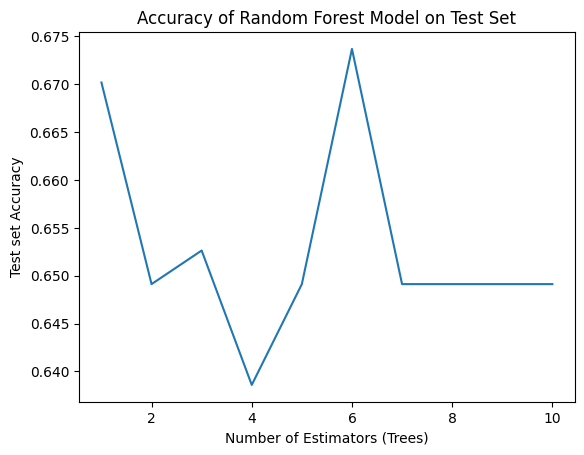

Best number of estimators for the best accuracy is: 6


In [53]:
# Initialize an empty list to store accuracies
accuracies = []

# Define a list of values for the number of estimators (trees)
n_estimators_list = list(range(1, 11))

# Loop through different number of estimators
for n_estimators in n_estimators_list:
    # Create a Random Forest model
    RFmodel = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Fit the model to the training data
    RFmodel.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    predictions = RFmodel.predict(X_test_scaled)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plot the results
plt.plot(n_estimators_list, accuracies)
plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Random Forest Model on Test Set")
plt.show()

# Convert the list to a NumPy array for easier analysis
l_np = np.asarray(accuracies)

# Find the best number of estimators for the best accuracy
best_n_estimators = n_estimators_list[l_np.argmax()]
print(f"Best number of estimators for the best accuracy is: {best_n_estimators}")

In [54]:
# Set the best number of estimators
best_n_estimators = 6

# Create a Random Forest model with the best number of estimators
RFmodel = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# Fit the model to the training data
RFmodel.fit(X_train_scaled, y_train)

# Calculate training accuracy
training_accuracy = RFmodel.score(X_train_scaled, y_train)
print("The accuracy of the model on training data is: {}%".format(round(training_accuracy, 2) * 100))
print()

# Make predictions on the test set
predictions = RFmodel.predict(X_test_scaled)

# Print classification report for the test set
print(classification_report(y_test, predictions))


The accuracy of the model on training data is: 72.0%

              precision    recall  f1-score   support

         0.0       0.54      0.15      0.23        95
         1.0       0.69      0.94      0.79       190

    accuracy                           0.67       285
   macro avg       0.61      0.54      0.51       285
weighted avg       0.64      0.67      0.61       285



Using the best estimator of 6 from the graph, it can be seen that the accuracy for training is 72%, while the accuracy for testing is at 68%.

Logistic Regression

In [55]:
logReg_model = LogisticRegression(multi_class = 'multinomial')
logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()


predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 67.0%

              precision    recall  f1-score   support

         0.0       0.50      0.01      0.02        95
         1.0       0.67      0.99      0.80       190

    accuracy                           0.67       285
   macro avg       0.58      0.50      0.41       285
weighted avg       0.61      0.67      0.54       285



Support Vector Machine

In [56]:
SVCmodel = SVC(kernel='linear', C = 1)

SVCmodel.fit(X_train_scaled, y_train)

trainign_accuracy = SVCmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 67.0%

              precision    recall  f1-score   support

         0.0       0.50      0.01      0.02        95
         1.0       0.67      0.99      0.80       190

    accuracy                           0.67       285
   macro avg       0.58      0.50      0.41       285
weighted avg       0.61      0.67      0.54       285



## Task 7
Model Comparison and Evaluation

From the models, it can be seen that:

1. There is no correlation between body type of the users, users dietary, orientation, whether the users have pets, religion of the users, sex, jobs, whether the userssmoke, the frequency of the user drinks , whether the users use drugs, and zodiac signs.
2. There is no correlation between the income of the user using gender, jobs, and education.
3. There is a higher probability to predict the gender of users using education level and income.
4. In the future, predicting the body type of the users can be used using age, and diet.